# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

### Reading and Understanding Data

In [38]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [39]:
# Determining the number of crops
crops['crop'].astype('category').value_counts()

crop
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

In [40]:
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [41]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [42]:
# checking the data types for the dataframe
crops.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [43]:
# checking for missing values 
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

**There are no missing values in the dataframe**

### Visualizing Outliers Using Box Plot

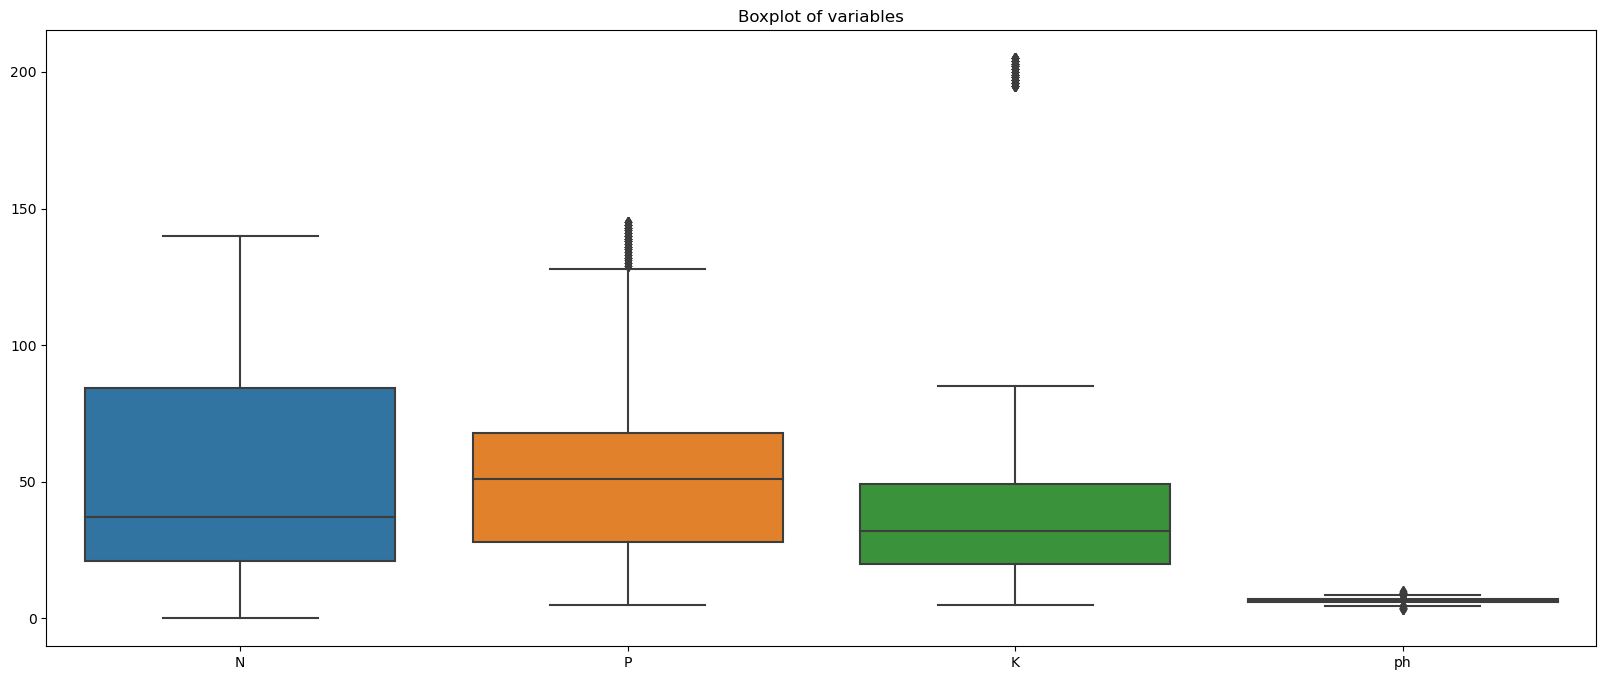

In [44]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.boxplot(data=crops)
plt.title('Boxplot of variables')
plt.show()

There are some outliers for 'Phosphorous' and 'Potassium'. 

### Handling Outliers

**Mean/Median Imputation**
As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.


In [45]:
columns = crops[['N', 'P', 'K', 'ph']]

In [46]:
columns

,N,P,K,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473
...,...,...,...,...
2195,107,34,32,6.780064
2196,99,15,27,6.086922
2197,118,33,30,6.362608
2198,117,32,34,6.758793


In [49]:
for col in columns:
    # calculate the median
    median = crops[col].median()
    
    # calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = crops[col].quantile(0.25)
    Q3 = crops[col].quantile(0.75)
    
    # Calculate Interquartile Range
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace the outliers with the median
    crops[col] = crops[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)


[Text(0.5, 1.0, 'Boxplot of variables')]

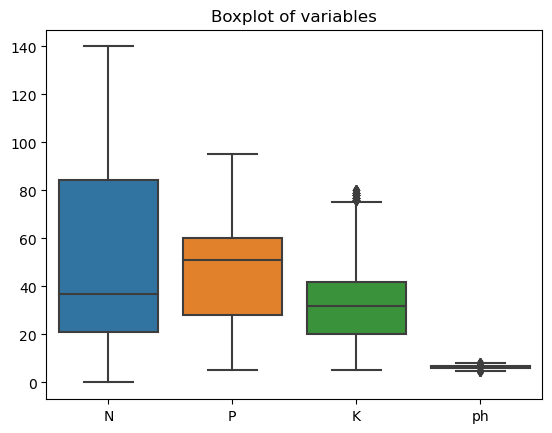

In [50]:
import seaborn as sns
#sns.boxplot(df_diabetics['bmi'])
sns.boxplot(data=crops).set(title='Boxplot of variables')

**There are no outliers for 'P' and few outliers in 'K'**

**Let's now make a pairwise scatter plot**

C:\Users\shefali sharma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

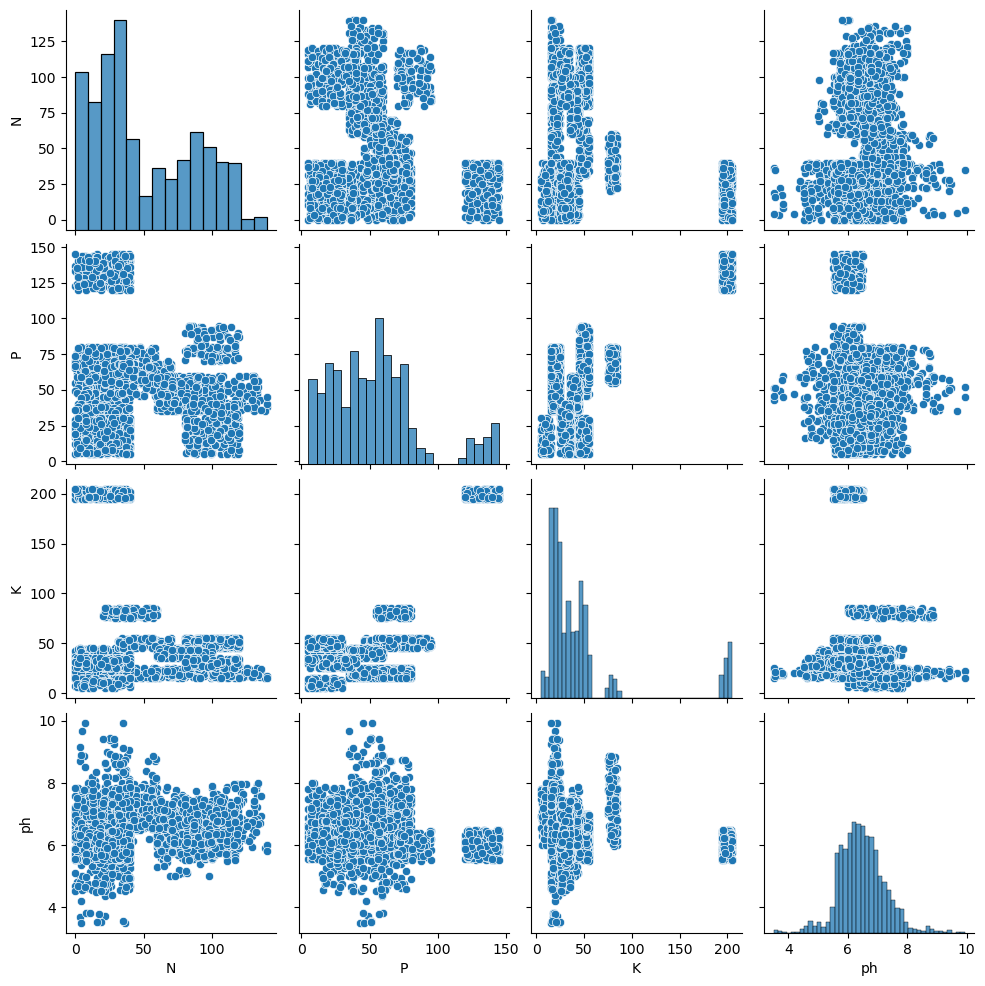

In [51]:
# pairwise scatter plot
plt.figure(figsize=(20,10))
sns.pairplot(columns)
plt.show()

This is quite hard to read, and we can rather plot correlations. Also, a heatmap is pretty useful to visualize multiple correlations in one plot.

In [52]:
# correlation matrix
cor = columns.corr()
cor

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


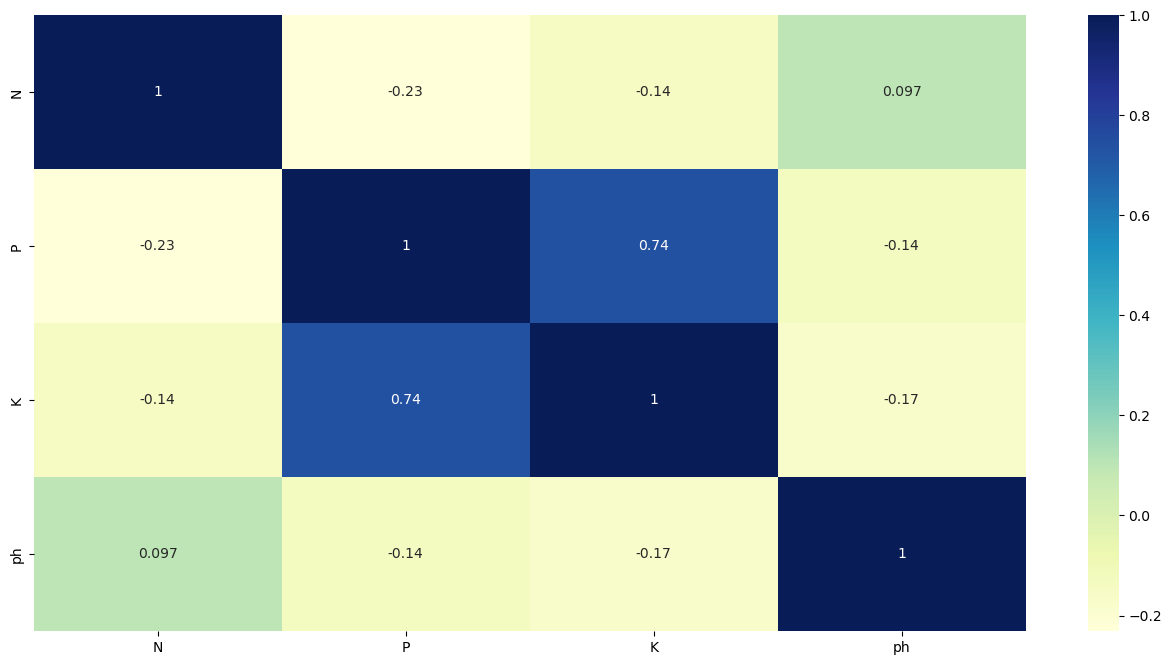

In [53]:
# Plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows use some useful insights:

The features P and K have a correlation coefficient of 0.74, which is the highest in the matrix and indicates a strong positive correlation. These are the features you might consider addressing to avoid multicollinearity.

### Data Preparation

Let's now preprare the data and build the model.


In [75]:
crops.head()

,N,P,K,ph,crop,crop_encoded
0,90,42.0,43.0,6.502985,rice,20
1,85,58.0,41.0,7.038096,rice,20
2,60,55.0,44.0,7.840207,rice,20
3,74,35.0,40.0,6.980401,rice,20
4,78,42.0,42.0,7.628473,rice,20


In [76]:
crops.dtypes

N                 int64
P               float64
K               float64
ph              float64
crop             object
crop_encoded      int32
dtype: object

In [77]:
# Checking the class distribution in the target column
crops['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

No classes are significantly less frequent than others, so there are no class imbalances

In [78]:
# label encoding for the 'crop' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crops['crop_encoded'] = label_encoder.fit_transform(crops['crop'])
crops.head()

,N,P,K,ph,crop,crop_encoded
0,90,42.0,43.0,6.502985,rice,20
1,85,58.0,41.0,7.038096,rice,20
2,60,55.0,44.0,7.840207,rice,20
3,74,35.0,40.0,6.980401,rice,20
4,78,42.0,42.0,7.628473,rice,20


In [79]:
crops[['crop','crop_encoded']].value_counts()

crop         crop_encoded
apple        0               100
banana       1               100
rice         20              100
pomegranate  19              100
pigeonpeas   18              100
papaya       17              100
orange       16              100
muskmelon    15              100
mungbean     14              100
mothbeans    13              100
mango        12              100
maize        11              100
lentil       10              100
kidneybeans  9               100
jute         8               100
grapes       7               100
cotton       6               100
coffee       5               100
coconut      4               100
chickpea     3               100
blackgram    2               100
watermelon   21              100
Name: count, dtype: int64

### Test-train Split

In [80]:
from sklearn.model_selection import train_test_split

# Putting feature variables to X
X = crops.drop(['crop', 'crop_encoded'], axis=1)
y = crops['crop_encoded']
print("Feature Variables:", X.head())
print("Target Variable:", y.head())

Feature Variables:     N     P     K        ph
0  90  42.0  43.0  6.502985
1  85  58.0  41.0  7.038096
2  60  55.0  44.0  7.840207
3  74  35.0  40.0  6.980401
4  78  42.0  42.0  7.628473
Target Variable: 0    20
1    20
2    20
3    20
4    20
Name: crop_encoded, dtype: int32


In [81]:
# Scaling the features
from sklearn.preprocessing import scale

cols = X.columns
cols

Index(['N', 'P', 'K', 'ph'], dtype='object')

In [82]:
X = pd.DataFrame(scale(X))
X

,0,1,2,3
0,1.068797,-0.183785,0.777445,0.079953
1,0.933329,0.575246,0.637958,0.906507
2,0.255986,0.432928,0.847188,2.145478
3,0.635298,-0.515860,0.568215,0.817388
4,0.743673,-0.183785,0.707702,1.818425
...,...,...,...,...
2195,1.529390,-0.563300,0.010271,0.507940
2196,1.312641,-1.464648,-0.338444,-0.562714
2197,1.827421,-0.610739,-0.129215,-0.136879
2198,1.800327,-0.658179,0.149757,0.475083


In [83]:
X.columns = cols
X.columns

Index(['N', 'P', 'K', 'ph'], dtype='object')

In [84]:
X.head()

,N,P,K,ph
0,1.068797,-0.183785,0.777445,0.079953
1,0.933329,0.575246,0.637958,0.906507
2,0.255986,0.432928,0.847188,2.145478
3,0.635298,-0.515860,0.568215,0.817388
4,0.743673,-0.183785,0.707702,1.818425


### Checking correlation matrix again

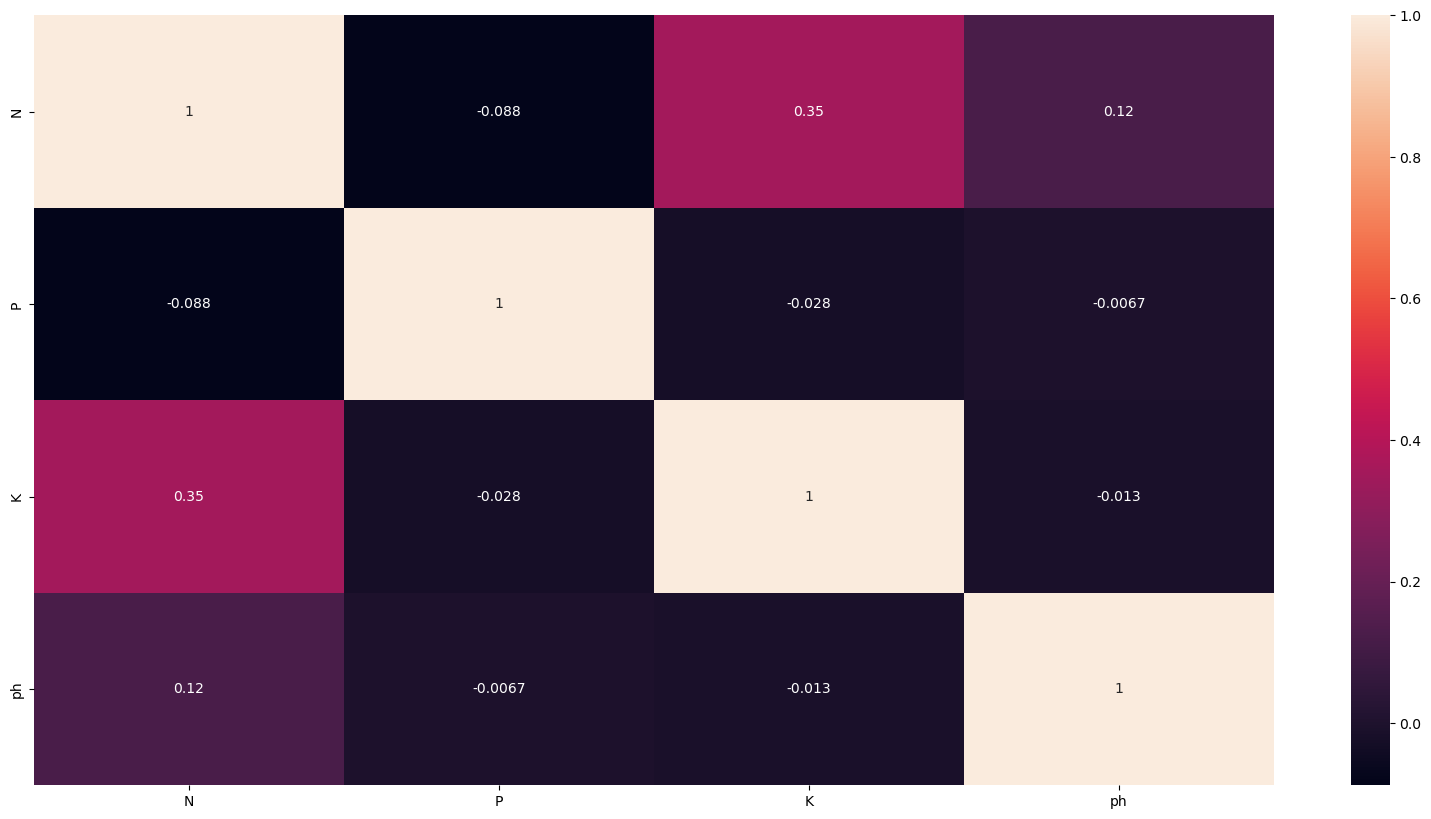

In [85]:
plt.figure(figsize= (20,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

The heatmap appears to show the some changes regarding the correlation coefficients between different variables in comparison to previous heatmap

**Correlation coefficients can range from -1 to 1, where:**

- 1 indicates a perfect positive correlation: as one variable increases, the other variable increases as well.
- -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases.
- 0 indicates no correlation: the variables do not have a linear relationship.

In the given heatmap:

- **Positive Correlations:** N and K show a positive correlation of 0.36, meaning there is a moderately positive linear relationship between these two variables.

- **Negative Correlations:** Based on this heatmap, there do not appear to be any strongly negative correlations between the variables.

- **No or Weak Correlations:** Values close to 0 indicate no or a weak correlation. For example, P and ph have a correlation of -0.015, which suggests no meaningful linear relationship.

**Regarding multicollinearity:**

Multicollinearity refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In the context of this heatmap, multicollinearity would be suggested by very high positive correlations (close to 1 or -1) between independent variables.

**Observation:** The heatmap does not indicate strong multicollinearity among variables.  The highest correlation is 0.36, which is not typically considered high enough to be concerned about multicollinearity.

In summary, based on the heatmap:

There is a moderate positive correlation between N and K.
There are no strong negative correlations.
There are no indications of problematic multicollinearity among the variables.


### Variance Inflation Factor (VIF)

Let's use VIF to detect the presence and intensity of multicollinearity.

Interpreting VIF:

- A VIF of 1 indicates that there is no multicollinearity between the chosen independent variable and the others.
- A VIF between 1 and 5 usually suggests that the multicollinearity is moderate.
- A VIF greater than 5 (some use a threshold of 10) indicates high multicollinearity, and you might want to consider addressing this issue


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to calculate VIF for each feature
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# calculate VIF for the features in the dataset
features = X[['N', 'P', 'K', 'ph']]
vif = calculate_vif(features)
vif


,feature,VIF
0,N,1.170112
1,P,1.007744
2,K,1.144739
3,ph,1.019056


Looks like VIF is fine for all variables

### RFE (Recursive Feature Elimination)

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=2)
rfe = rfe.fit(X, y)

In [88]:
rfe.support_

array([False,  True,  True, False])

In [89]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('N', False, 2), ('P', True, 1), ('K', True, 1), ('ph', False, 3)]

In [90]:
# Select the features that were determined as significant
X_reduced = X.loc[:, rfe.support_]
X_reduced

,P,K
0,-0.183785,0.777445
1,0.575246,0.637958
2,0.432928,0.847188
3,-0.515860,0.568215
4,-0.183785,0.707702
...,...,...
2195,-0.563300,0.010271
2196,-1.464648,-0.338444
2197,-0.610739,-0.129215
2198,-0.658179,0.149757


In [91]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# X_train and X_test now contain only the features selected by RFE

In [92]:
print("Training data: ", X_train.head())
print("Shape of Training Data: ",X_train.shape)
print("Testing data: ", X_test.head())
print("Shape of Testing data: ",X_test.shape)
print("Training Target Data: ",y_train.head())
print("Testing Target data: ", y_test.head())

Training data:               P         K
1656 -1.417209 -1.245103
752   1.571473 -0.896388
892   1.286837 -0.477930
1041  1.144519  1.126160
1179 -1.369769 -0.129215
Shape of Training Data:  (1760, 2)
Testing data:               P         K
1451 -1.369769  1.056417
1334 -1.796724  1.335389
1761  0.765003  1.195903
1735  0.670125  1.614361
1576  0.243170  0.010271
Shape of Testing data:  (440, 2)
Training Target Data:  1656    16
752      2
892     10
1041     1
1179    12
Name: crop_encoded, dtype: int32
Testing Target data:  1451    15
1334    21
1761    17
1735    17
1576     0
Name: crop_encoded, dtype: int32


### Building Logistic Regression Model


In [93]:
# Creating and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
# Increased max_iter for convergence

log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)



In [94]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("accuracy score:", accuracy)

accuracy score: 0.4022727272727273


C:\Users\shefali sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shefali sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shefali sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
from sklearn.metrics import f1_score

model_performance = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score: ", model_performance)

Weighted F1 Score:  0.3469039384215923
